In [4]:
# GERAL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import math
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.datasets import load_boston
load_df = load_boston()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

In [25]:
dataset.corr()['target']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [23]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X_train, X_test, y_train, y_test= train_test_split(dataset.drop(columns = 'target'),
                                                   dataset['target'],
                                                   test_size=1/3, 
                                                   shuffle=False)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(337, 13)
y_train shape:(337,)
X_test shape:(169, 13)
y_test shape:(169,)


<BarContainer object of 2 artists>

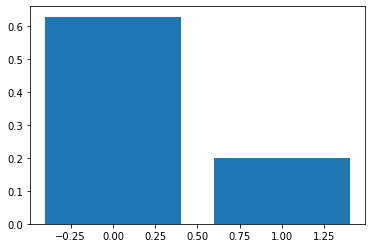

In [14]:
#Applying PCA
from sklearn.decomposition import PCA
PCA=PCA(n_components=2)
X_train = PCA.fit_transform(X_train)
X_test = PCA.transform(X_test)
explained_variance= PCA.explained_variance_ratio_

plt.bar(np.arange(len(explained_variance)), explained_variance)

In [22]:
PCA.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  6.20207202e-16,
        -6.22005352e-17,  5.36140365e-17]])

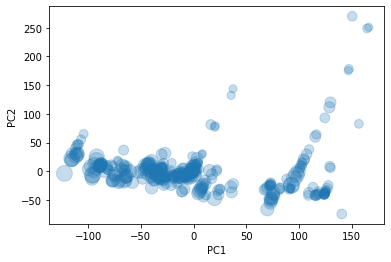

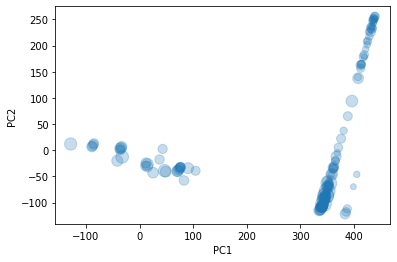

In [26]:
plt.scatter(X_train[:,0], X_train[:,1], s=5*y_train, alpha=0.25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], s=5*y_test, alpha=0.25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [98]:
def euclidiana(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())
    
f_dist = lambda x1,x2,sigma: np.exp(-euclidiana(x1,x2)**2/(2*sigma**2))

f_dist_2 = lambda x1,x2: 1/(euclidiana(x1,x2)+1)

In [99]:
euclidiana(np.array([0,3]), np.array([4,0]))

5.0

In [100]:
x_0 = np.array([0,0])
x_1 = np.array([[x,0] for x in np.arange(-5,5,0.01)])

f_d=[]

for x_ in x_1:
#     f_d.append(f_dist(x_0, x_, 0.5))
    f_d.append(f_dist_2(x_0, x_))

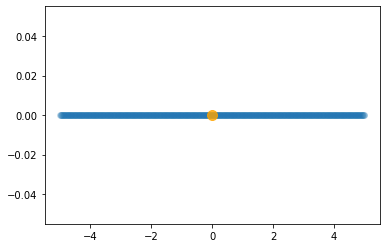

In [101]:
plt.scatter(x_1[:,0], x_1[:,1], alpha=0.1)
plt.scatter(x_0[0], x_0[1], alpha=0.8, c='orange', s=100)


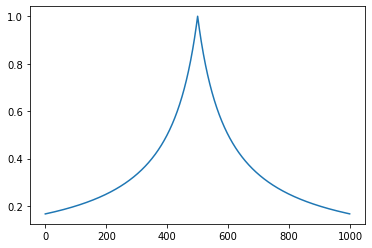

In [102]:
plt.plot(np.arange(len(f_d)),f_d)